# Quora question Pair Similarity 

### 1.2.1 : EDA: Advanced Feature Extraction.


In [20]:
!pip install --upgrade nbformat

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 170 kB 2.8 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
!pip install fuzzywuzzy

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 357 kB 2.7 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 9.8 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [9]:
!pip install stopwords

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 41 kB 707 kB/s eta 0:00:011
  Created wheel for stopwords: filename=stopwords-0.1.3-py2.py3-none-any.whl size=37625 sha256=cf3e8caed06105a1dd37b0878108fc6ff21ffb87fdbba3e55b0b679dc47e3a17
  Stored in directory: /home/deeplearning_aaic2020/.cache/pip/wheels/de/56/0b/4980dd47be52dfa95d59c9a52e1f7ef094b85c650a089def13
Successfully built stopwords


In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc

import re
from nltk.corpus import stopwords
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
# This package is used for finding longest common subsequence between two strings
# you can write your own dp code for this
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from fuzzywuzzy import fuzz
from sklearn.manifold import TSNE
# Import the Required lib packages for WORD-Cloud generation
# https://stackoverflow.com/questions/45625434/how-to-install-wordcloud-in-python3-6
from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image

In [3]:
#https://stackoverflow.com/questions/12468179/unicodedecodeerror-utf8-codec-cant-decode-byte-0x9c
if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    df = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
    df = df.fillna('')
    df.head()
else:
    print("get df_fe_without_preprocessing_train.csv from drive or run the previous notebook")

In [4]:
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3


<h2> 3.4 Preprocessing of Text </h2>

- Preprocessing:
    - Removing html tags 
    - Removing Punctuations
    - Performing stemming
    - Removing Stopwords
    - Expanding contractions etc.

In [5]:

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/deeplearning_aaic2020/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
# To get the results in 4 decemal points
SAFE_DIV = 0.0001 

STOP_WORDS = stopwords.words("english")


def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    
    return x
    

- Function to Compute and get the features : With 2 parameters of Question 1 and Question 2

<h2> 3.5 Advanced Feature Extraction (NLP and Fuzzy Features) </h2>

Definition:
- __Token__: You get a token by splitting sentence a space
- __Stop_Word__ : stop words as per NLTK.
- __Word__ : A token that is not a stop_word


Features:
- __cwc_min__ :  Ratio of common_word_count to min lenghth of word count of Q1 and Q2 <br>cwc_min = common_word_count / (min(len(q1_words), len(q2_words))
<br>
<br>
- __cwc_max__ :  Ratio of common_word_count to max lenghth of word count of Q1 and Q2 <br>cwc_max = common_word_count / (max(len(q1_words), len(q2_words))
<br>
<br>
- __csc_min__ :  Ratio of common_stop_count to min lenghth of stop count of Q1 and Q2 <br> csc_min = common_stop_count / (min(len(q1_stops), len(q2_stops))
<br>
<br>
- __csc_max__ :  Ratio of common_stop_count to max lenghth of stop count of Q1 and Q2<br>csc_max = common_stop_count / (max(len(q1_stops), len(q2_stops))
<br>
<br>
- __ctc_min__ :  Ratio of common_token_count to min lenghth of token count of Q1 and Q2<br>ctc_min = common_token_count / (min(len(q1_tokens), len(q2_tokens))
<br>
<br>

- __ctc_max__ :  Ratio of common_token_count to max lenghth of token count of Q1 and Q2<br>ctc_max = common_token_count / (max(len(q1_tokens), len(q2_tokens))
<br>
<br>
        
- __last_word_eq__ :  Check if First word of both questions is equal or not<br>last_word_eq = int(q1_tokens[-1] == q2_tokens[-1])
<br>
<br>

- __first_word_eq__ :  Check if First word of both questions is equal or not<br>first_word_eq = int(q1_tokens[0] == q2_tokens[0])
<br>
<br>
        
- __abs_len_diff__ :  Abs. length difference<br>abs_len_diff = abs(len(q1_tokens) - len(q2_tokens))
<br>
<br>

- __mean_len__ :  Average Token Length of both Questions<br>mean_len = (len(q1_tokens) + len(q2_tokens))/2
<br>
<br>


- __fuzz_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>

- __fuzz_partial_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>


- __token_sort_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>


- __token_set_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>





- __longest_substr_ratio__ :  Ratio of length longest common substring to min lenghth of token count of Q1 and Q2<br>longest_substr_ratio = len(longest common substring) / (min(len(q1_tokens), len(q2_tokens))


In [7]:
def get_token_features(q1, q2):
    token_features = [0.0]*10
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features
    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    token_features[8] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    token_features[9] = (len(q1_tokens) + len(q2_tokens))/2
    return token_features

# get the Longest Common sub string

def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)

def extract_features(df):
    # preprocessing each question
    df["question1"] = df["question1"].fillna("").apply(preprocess)
    df["question2"] = df["question2"].fillna("").apply(preprocess)

    print("token features...")
    
    # Merging Features with dataset
    
    token_features = df.apply(lambda x: get_token_features(x["question1"], x["question2"]), axis=1)
    
    df["cwc_min"]       = list(map(lambda x: x[0], token_features))
    df["cwc_max"]       = list(map(lambda x: x[1], token_features))
    df["csc_min"]       = list(map(lambda x: x[2], token_features))
    df["csc_max"]       = list(map(lambda x: x[3], token_features))
    df["ctc_min"]       = list(map(lambda x: x[4], token_features))
    df["ctc_max"]       = list(map(lambda x: x[5], token_features))
    df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
    df["first_word_eq"] = list(map(lambda x: x[7], token_features))
    df["abs_len_diff"]  = list(map(lambda x: x[8], token_features))
    df["mean_len"]      = list(map(lambda x: x[9], token_features))
   
    #Computing Fuzzy Features and Merging with Dataset
    
    # do read this blog: http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
    # https://stackoverflow.com/questions/31806695/when-to-use-which-fuzz-function-to-compare-2-strings
    # https://github.com/seatgeek/fuzzywuzzy
    print("fuzzy features..")

    df["token_set_ratio"]       = df.apply(lambda x: fuzz.token_set_ratio(x["question1"], x["question2"]), axis=1)
    # The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and 
    # then joining them back into a string We then compare the transformed strings with a simple ratio().
    df["token_sort_ratio"]      = df.apply(lambda x: fuzz.token_sort_ratio(x["question1"], x["question2"]), axis=1)
    df["fuzz_ratio"]            = df.apply(lambda x: fuzz.QRatio(x["question1"], x["question2"]), axis=1)
    df["fuzz_partial_ratio"]    = df.apply(lambda x: fuzz.partial_ratio(x["question1"], x["question2"]), axis=1)
    df["longest_substr_ratio"]  = df.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)
    return df

In [8]:
if os.path.isfile('nlp_features_train.csv'):
    df = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
    df.fillna('')
else:
    print("Extracting features for train:")
    df = pd.read_csv("train.csv")
    df = extract_features(df)
    df.to_csv("nlp_features_train.csv", index=False)
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,0.999980,0.833319,0.999983,0.999983,...,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,0.799984,0.399996,0.749981,0.599988,...,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154


<h3>3.5.1 Analysis of extracted features </h3>

<h4> 3.5.1.1 Plotting Word clouds</h4>

- Creating Word Cloud of Duplicates and Non-Duplicates Question pairs
- We can observe the most frequent occuring words

In [9]:
df_duplicate = df[df['is_duplicate'] == 1]
dfp_nonduplicate = df[df['is_duplicate'] == 0]

# Converting 2d array of q1 and q2 and flatten the array: like {{1,2},{3,4}} to {1,2,3,4}
p = np.dstack([df_duplicate["question1"], df_duplicate["question2"]]).flatten()
n = np.dstack([dfp_nonduplicate["question1"], dfp_nonduplicate["question2"]]).flatten()

print ("Number of data points in class 1 (duplicate pairs) :",len(p))
print ("Number of data points in class 0 (non duplicate pairs) :",len(n))

#Saving the np array into a text file
np.savetxt('train_p.txt', p, delimiter=' ', fmt='%s')
np.savetxt('train_n.txt', n, delimiter=' ', fmt='%s')

Number of data points in class 1 (duplicate pairs) : 298526
Number of data points in class 0 (non duplicate pairs) : 510054


In [10]:
# reading the text files and removing the Stop Words:
d = path.dirname('.')

textp_w = open(path.join(d, 'train_p.txt')).read()
textn_w = open(path.join(d, 'train_n.txt')).read()
stopwords = set(STOPWORDS)
stopwords.add("said")
stopwords.add("br")
stopwords.add(" ")
stopwords.remove("not")

stopwords.remove("no")
#stopwords.remove("good")
#stopwords.remove("love")
stopwords.remove("like")
#stopwords.remove("best")
#stopwords.remove("!")
print ("Total number of words in duplicate pair questions :",len(textp_w))
print ("Total number of words in non duplicate pair questions :",len(textn_w))

Total number of words in duplicate pair questions : 16109886
Total number of words in non duplicate pair questions : 33193130


__ Word Clouds generated from  duplicate pair question's text __

Word Cloud for Duplicate Question pairs


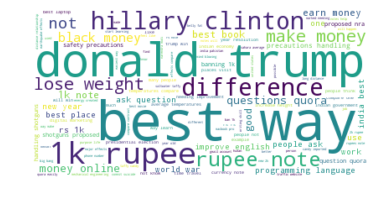

In [25]:
wc = WordCloud(background_color="white", max_words=len(textp_w), stopwords=stopwords)
wc.generate(textp_w)
print ("Word Cloud for Duplicate Question pairs")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

__ Word Clouds generated from non duplicate pair question's text __

Word Cloud for non-Duplicate Question pairs:


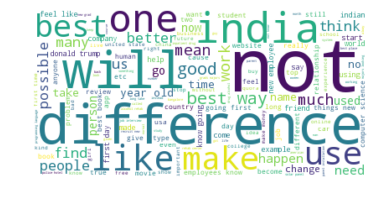

In [26]:
wc = WordCloud(background_color="white", max_words=len(textn_w),stopwords=stopwords)
# generate word cloud
wc.generate(textn_w)
print ("Word Cloud for non-Duplicate Question pairs:")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<h4> 3.5.1.2 Pair plot of features ['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'] </h4>

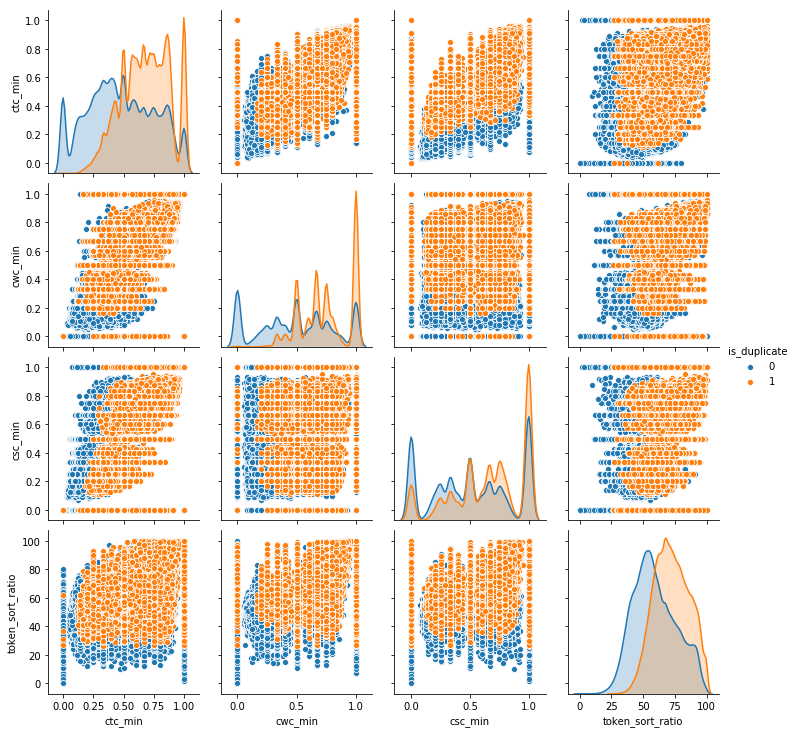

In [28]:
n = df.shape[0]
sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio', 'is_duplicate']][0:n], hue='is_duplicate', vars=['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'])
plt.show()

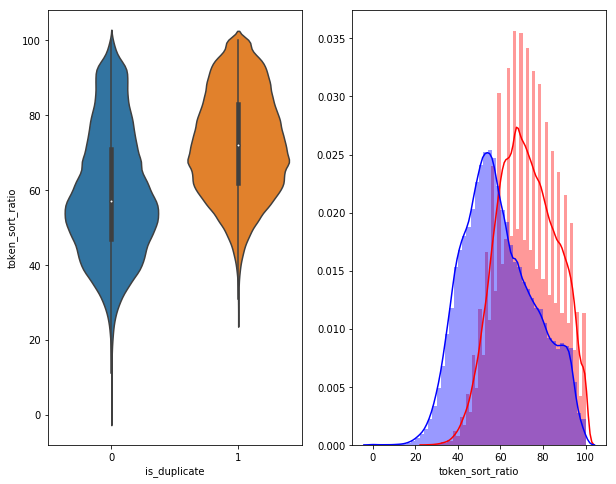

In [31]:
# Distribution of the token_sort_ratio
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'token_sort_ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['token_sort_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['token_sort_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

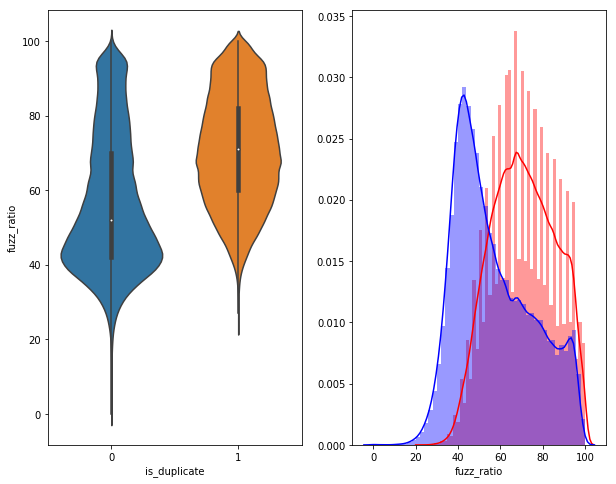

In [32]:
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'fuzz_ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['fuzz_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['fuzz_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

<h3>3.5.2 Visualization </h3>

In [33]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

dfp_subsampled = df[0:5000]
X = MinMaxScaler().fit_transform(dfp_subsampled[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = dfp_subsampled['is_duplicate'].values

In [34]:
tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.070s...
[t-SNE] Computed neighbors for 5000 samples in 0.360s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.116557
[t-SNE] Computed conditional probabilities in 0.492s
[t-SNE] Iteration 50: error = 80.9733810, gradient norm = 0.0451379 (50 iterations in 0.814s)
[t-SNE] Iteration 100: error = 70.4407883, gradient norm = 0.0098959 (50 iterations in 0.656s)
[t-SNE] Iteration 150: error = 68.6497803, gradient norm = 0.0059423 (50 iterations in 0.661s)
[t-SNE] Iteration 200: error = 67.8067017, gradient norm = 0.0040715 (50 iterations in 0.688s)
[t-SNE] Iteration 250: error = 67.3086243, gradient norm = 0.0031636

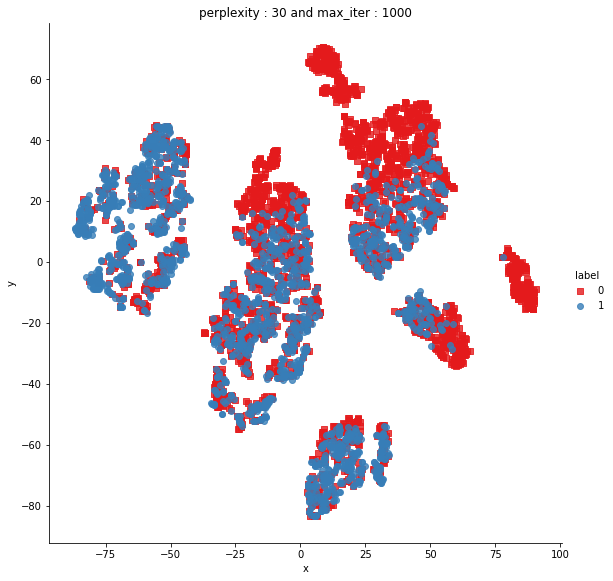

In [35]:
df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])
plt.title("perplexity : {} and max_iter : {}".format(30, 1000))
plt.show()

In [36]:
from sklearn.manifold import TSNE
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.014s...
[t-SNE] Computed neighbors for 5000 samples in 0.359s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.116557
[t-SNE] Computed conditional probabilities in 0.324s
[t-SNE] Iteration 50: error = 80.3930130, gradient norm = 0.0316219 (50 iterations in 2.815s)
[t-SNE] Iteration 100: error = 69.1348343, gradient norm = 0.0037228 (50 iterations in 1.854s)
[t-SNE] Iteration 150: error = 67.6472473, gradient norm = 0.0017098 (50 iterations in 1.716s)
[t-SNE] Iteration 200: error = 67.0883026, gradient norm = 0.0013475 (50 iterations in 1.714s)
[t-SNE] Iteration 250: error = 66.7617722, gradient norm = 0.0009441

<h2> 3.6 Featurizing text data with tfidf weighted word-vectors </h2>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings("ignore")
import sys
import os 
import pandas as pd
from scipy.sparse import hstack
import numpy as np
from tqdm import tqdm
from tqdm import tqdm_notebook as tqdm1

# exctract word2vec vectors
# https://github.com/explosion/spaCy/issues/1721
# http://landinghub.visualstudio.com/visual-cpp-build-tools
import spacy
from sklearn.model_selection import train_test_split

In [106]:
# avoid decoding problems
df = pd.read_csv("train.csv")
 
# encode questions to unicode
# https://stackoverflow.com/a/6812069
# ----------------- python 2 ---------------------
# df['question1'] = df['question1'].apply(lambda x: unicode(str(x),"utf-8"))
# df['question2'] = df['question2'].apply(lambda x: unicode(str(x),"utf-8"))
# ----------------- python 3 ---------------------
df['question1'] = df['question1'].apply(lambda x: str(x))
df['question2'] = df['question2'].apply(lambda x: str(x))

In [107]:
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0


In [108]:
#prepro_features_train.csv (Simple Preprocessing Feartures)
#nlp_features_train.csv (NLP Features)
if os.path.isfile('nlp_features_train.csv'):
    dfnlp = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
else:
    print("download nlp_features_train.csv from drive or run previous notebook")

if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    dfppro = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    print("download df_fe_without_preprocessing_train.csv from drive or run previous notebook")

In [109]:
dfnlp.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,0.999980,0.833319,0.999983,0.999983,...,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,0.799984,0.399996,0.749981,0.599988,...,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154


In [110]:
dfppro.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3


In [111]:
df1  = dfnlp.merge(dfppro, on='id',how='left')

In [112]:
df1['qid1_x']

0              1
1              3
2              5
3              7
4              9
           ...  
404285    433578
404286     18840
404287    537928
404288    537930
404289    537932
Name: qid1_x, Length: 404290, dtype: int64

In [113]:
df1 = df1.drop(['qid1_x','qid2_x'],axis=1)
# df2 = dfppro.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
df3 = df.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)

In [114]:
df1.head(2)

,id,question1_x,question2_x,is_duplicate_x,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,...,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,...,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,...,1,51,88,8,13,4.0,20.0,0.200000,5,3


In [115]:
df1.shape

(404290, 35)

In [116]:
df4  = df1.merge(df3, on='id',how='left')

In [117]:
df4.shape

(404290, 35)

In [118]:
df4 = df4.sample(n=50000)

In [119]:
df4.shape

(50000, 35)

In [27]:
df4.shape

(50000, 35)

In [28]:
y_true = df4['is_duplicate_x']

In [29]:
y_true

352192    0
108987    0
298503    1
67093     0
205074    0
         ..
58795     0
299169    1
192350    0
15612     0
231494    0
Name: is_duplicate_x, Length: 50000, dtype: int64

In [104]:
df4 = df4.drop(['is_duplicate_x'],axis=1)

KeyError: "['is_duplicate_x'] not found in axis"

In [102]:
df4.shape

(35000, 193)

In [32]:
X_train,X_test, y_train, y_test = train_test_split(df4, y_true, stratify=y_true, test_size=0.3)

In [33]:
X_train.shape

(35000, 34)

In [36]:
X_test.shape

(15000, 34)

In [37]:
# Filling the null values with ' '
X_train = X_train.fillna(' ')
nan_rows1 = X_train[X_train.isnull().any(1)]
print (nan_rows1)

# Filling the null values with ' '
X_test = X_test.fillna(' ')
nan_rows2 = X_test[X_test.isnull().any(1)]
print (nan_rows2)

Empty DataFrame
Columns: [id, question1_x, question2_x, cwc_min, cwc_max, csc_min, csc_max, ctc_min, ctc_max, last_word_eq, first_word_eq, abs_len_diff, mean_len, token_set_ratio, token_sort_ratio, fuzz_ratio, fuzz_partial_ratio, longest_substr_ratio, qid1_y, qid2_y, question1_y, question2_y, is_duplicate_y, freq_qid1, freq_qid2, q1len, q2len, q1_n_words, q2_n_words, word_Common, word_Total, word_share, freq_q1+q2, freq_q1-q2]
Index: []

[0 rows x 34 columns]
Empty DataFrame
Columns: [id, question1_x, question2_x, cwc_min, cwc_max, csc_min, csc_max, ctc_min, ctc_max, last_word_eq, first_word_eq, abs_len_diff, mean_len, token_set_ratio, token_sort_ratio, fuzz_ratio, fuzz_partial_ratio, longest_substr_ratio, qid1_y, qid2_y, question1_y, question2_y, is_duplicate_y, freq_qid1, freq_qid2, q1len, q2len, q1_n_words, q2_n_words, word_Common, word_Total, word_share, freq_q1+q2, freq_q1-q2]
Index: []

[0 rows x 34 columns]


## TFIDFW2V Vectorization on train data:

In [38]:
X_train['question1_x'].isnull().values.any()

False

In [39]:
X_train[X_train.isnull().any(1)]

,id,question1_x,question2_x,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,...,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions_train = list(X_train['question1_x']) + list(X_train['question2_x'])

tfidf_train = TfidfVectorizer(lowercase=False, )
tfidf_train.fit_transform(questions_train)

# # dict key:word and value:tf-idf score
word2tfidf_train = dict(zip(tfidf_train.get_feature_names(), tfidf_train.idf_))

In [41]:
(X_train['question1_x'][12980:12995])

66251     i have a tatoo in my hand am i eligible for im...
71460                            can magnets work in space 
369616            what is an integro differential equation 
19884       why does the uk have an unwritten constitution 
179443          is the anonymous option on quora justified 
263314                       what is an acid  base  and ph 
12660     i have done mba in marketing from a tier 3 col...
111122        why can not i think of things to say quickly 
287502    are police officers allowed to carry open guns...
69855                                     where is belgium 
304837         what are the causes for the coriolis effect 
54252                        how do i tempt a girl for sex 
232804    what is the homeopathic treatment for asthma i...
401436                         what is bernoullis equation 
43716     what prevents electrons from falling into the ...
Name: question1_x, dtype: object

In [62]:
import spacy.cli#command line interface cli
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [63]:
# en_vectors_web_lg, which includes over 1 million unique vectors.
nlp = spacy.load('en_core_web_sm')

vecs1 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm1(list(X_train['question1_x'])):
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf_train[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)
X_train['q1_feats_m'] = list(vecs1)

In [64]:
vecs2 = []
for qu2 in tqdm1(list(X_train['question2_x'])):
    doc2 = nlp(qu2) 
    mean_vec2 = np.zeros([len(doc2), len(doc2[0].vector)])
    for word2 in doc2:
        # word2vec
        vec2 = word2.vector
        # fetch df score
        try:
            idf = word2tfidf_train[str(word2)]
        except:
            #print word
            idf = 0
        # compute final vec
        mean_vec2 += vec2 * idf
    mean_vec2 = mean_vec2.mean(axis=0)
    vecs2.append(mean_vec2)
X_train['q2_feats_m'] = list(vecs2)

In [65]:
X_train_q1 = pd.DataFrame(X_train.q1_feats_m.values.tolist(), index= X_train.index)
X_train_q2 = pd.DataFrame(X_train.q2_feats_m.values.tolist(), index= X_train.index)

In [66]:
if (1):
    X_train_q1['id']=X_train['id']
    X_train_q2['id']=X_train['id']
    df1  = X_train_q1.merge(X_train_q2, on='id',how='left')
    X_train  = X_train.merge(df1, on='id',how='left')

In [67]:
## TFIDFW2V Vectorization on test data:

In [68]:
X_test['question1_x'].isnull().values.any()

False

In [69]:
X_test[X_test.isnull().any(1)]

,id,question1_x,question2_x,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,...,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2


In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions_test = list(X_test['question1_x']) + list(X_test['question2_x'])

# tfidf_train = TfidfVectorizer(lowercase=False, )
tfidf_train.transform(questions_test)

# # dict key:word and value:tf-idf score
word2tfidf_test = dict(zip(tfidf_train.get_feature_names(), tfidf_train.idf_))

In [71]:
(X_test['question1_x'][12980:12995])

293987    what are some decently paying 5 6 hour of work...
354653    how will salaries be affected by the 7th pay c...
107066                        what is supercritical boiler 
310026    why did the value of the british pound drop im...
14161                       what is an interquartile range 
294049                       is the law of attraction real 
28811     why do chinese people eat rice with chopsticks...
174604    what was the role of the king own ward in came...
1623          can american political parties expel members 
28107     how do i become extremely extrovert person if ...
116589           will apple release a new macbook pro soon 
64034     are there any stories in chinese literature th...
11604                    should i watch ae dil hai mushkil 
11978     how much money can i make in a week playing po...
218352                 how does it feel to fight ocd urges 
Name: question1_x, dtype: object

In [72]:
# en_vectors_web_lg, which includes over 1 million unique vectors.
nlp = spacy.load('en_core_web_sm')

vecs1 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm1(list(X_test['question1_x'])):
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf_test[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)
X_test['q1_feats_m'] = list(vecs1)

In [74]:
vecs2 = []
for qu2 in tqdm1(list(X_test['question2_x'])):
    doc2 = nlp(qu2) 
    mean_vec2 = np.zeros([len(doc2), len(doc2[0].vector)])
    for word2 in doc2:
        # word2vec
        vec2 = word2.vector
        # fetch df score
        try:
            idf = word2tfidf_test[str(word2)]
        except:
            #print word
            idf = 0
        # compute final vec
        mean_vec2 += vec2 * idf
    mean_vec2 = mean_vec2.mean(axis=0)
    vecs2.append(mean_vec2)
X_test['q2_feats_m'] = list(vecs2)

In [75]:
X_test_q1 = pd.DataFrame(X_test.q1_feats_m.values.tolist(), index= X_test.index)
X_test_q2 = pd.DataFrame(X_test.q2_feats_m.values.tolist(), index= X_test.index)

In [76]:
X_test.drop(['q1_feats_m','q2_feats_m'],axis=1)

,id,question1_x,question2_x,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,...,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
187091,187091,now that the supreme court has ordered the tak...,i eat a tbsp of roasted ungrounded flax seeds ...,0.000000,0.000000,0.428565,0.333330,0.176470,0.115384,0.0,...,1,148,95,26,17,3.0,41.0,0.073171,2,0
92718,92718,how does the genius bar in apple check my devi...,to keep its funding for other services why do...,0.000000,0.000000,0.333330,0.230767,0.149999,0.120000,0.0,...,1,122,125,23,20,1.0,41.0,0.024390,2,0
335486,335486,is there any scope in software engineering,what is the scope of software engineering,0.999967,0.999967,0.249994,0.249994,0.571420,0.571420,1.0,...,1,43,42,7,7,4.0,14.0,0.285714,2,0
359487,359487,how do i earn money online,how do i earn money from the internet,0.666644,0.666644,0.999967,0.599988,0.833319,0.624992,0.0,...,14,27,38,6,8,5.0,14.0,0.357143,54,26
222360,222360,what happens if i erase my hotmail account on ...,what will happen with my google apps account w...,0.111110,0.099999,0.857131,0.545450,0.411762,0.304347,0.0,...,1,115,89,23,17,7.0,37.0,0.189189,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330662,330662,what is prison like in japan,what is prison like in japan,0.999967,0.999967,0.999967,0.999967,0.999983,0.999983,1.0,...,1,29,28,6,5,4.0,11.0,0.363636,2,0
376633,376633,why is a tag heuer watch much more expensive t...,i am missing the very end piece of a tag heuer...,0.374995,0.249998,0.199996,0.090908,0.285712,0.129032,0.0,...,1,76,144,14,31,4.0,36.0,0.111111,2,0
393121,393121,what is the most beautiful thing about you,what is the most beautiful thing you have done,0.999950,0.666644,0.833319,0.833319,0.874989,0.777769,0.0,...,3,43,44,8,7,4.0,15.0,0.266667,4,2
368776,368776,how do i edit my question on quora when i real...,how do i edit a question after it is already p...,0.499988,0.333328,0.571420,0.499994,0.545450,0.374998,0.0,...,5,75,51,16,10,6.0,24.0,0.250000,7,3


In [77]:
if (1):
    X_test_q1['id']=X_test['id']
    X_test_q2['id']=X_test['id']
    df2  = X_test_q1.merge(X_test_q2, on='id',how='left')
    X_test  = X_test.merge(df2, on='id',how='left')

In [78]:
X_train.shape

(35000, 228)

In [79]:
X_test.shape

(15000, 228)

In [80]:
## Storing final features and their targets with respective splitting

In [81]:
X_train.to_pickle("X_train.txt")
y_train.to_pickle("y_train.txt")
X_test.to_pickle("X_test.txt")
y_test.to_pickle("y_test.txt")

In [82]:
X_train = pd.read_pickle("X_train.txt")
y_train = pd.read_pickle("y_train.txt")
X_test = pd.read_pickle("X_test.txt")
y_test = pd.read_pickle("y_test.txt")

In [83]:
X_train = X_train.drop(['id','question1_x','question2_x','q1_feats_m','q2_feats_m','qid1_y','qid2_y','question1_y','question2_y','is_duplicate_y'],axis=1)
# X_train.drop(X_train.index[0], inplace=True)
X_test = X_test.drop(['id','question1_x','question2_x','q1_feats_m','q2_feats_m','qid1_y','qid2_y','question1_y','question2_y','is_duplicate_y'],axis=1)
# X_test.drop(X_test.index[0], inplace=True)

In [84]:
X_train

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,...,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,0.666656,0.444440,0.799984,0.571420,0.727266,0.499997,1.0,1.0,5.0,13.5,...,-11.538834,19.131320,-2.019267,69.490613,-19.551113,20.880025,-71.422317,30.160872,178.918880,-0.593966
1,0.857131,0.857131,0.999983,0.999983,0.857137,0.857137,1.0,1.0,0.0,14.0,...,-22.512503,59.926030,-22.099375,88.055313,-9.518655,-40.142549,3.380919,23.391282,-23.391434,81.851691
2,0.249994,0.111110,0.833319,0.714276,0.545450,0.333331,0.0,1.0,7.0,14.5,...,24.951594,10.713392,-17.120866,26.304374,-4.707601,-39.861174,-25.828274,48.146693,-16.922867,18.011155
3,0.000000,0.000000,0.499988,0.285710,0.199998,0.153845,0.0,0.0,3.0,11.5,...,-22.384230,-70.164095,1.319824,-2.216181,-7.389338,-39.521847,-30.372854,160.391996,36.169955,69.521562
4,0.777769,0.636358,0.499992,0.499992,0.666662,0.526313,0.0,0.0,4.0,17.0,...,-11.745228,4.168140,-41.496733,67.143338,-22.436253,-58.666343,-75.827325,80.733182,36.317074,53.848002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,5.0,7.5,...,-18.206663,-11.184066,9.587766,-1.091508,-17.962534,-5.210996,-13.527703,-51.905977,-26.903693,73.058650
34996,0.499988,0.333328,0.249994,0.199996,0.374995,0.272725,1.0,0.0,3.0,9.5,...,-73.421218,-17.018286,-5.841054,85.809711,-34.702567,-14.787503,-13.126394,2.571074,31.023441,29.853289
34997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,7.0,...,-29.976171,-20.300224,19.341274,0.269140,-39.986235,-21.570113,3.888720,37.995161,40.371061,39.179221
34998,0.399992,0.199998,0.599988,0.499992,0.499995,0.312498,0.0,0.0,6.0,13.0,...,-42.434702,-68.133044,-7.022306,55.092489,-6.385404,-63.429851,49.440428,128.004249,10.574741,88.595115


In [85]:
X_test

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,...,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,0.000000,0.000000,0.428565,0.333330,0.176470,0.115384,0.0,0.0,9.0,21.5,...,13.208267,-29.634965,-42.905685,58.508970,13.828820,10.893747,23.651937,17.703440,20.660477,63.721450
1,0.000000,0.000000,0.333330,0.230767,0.149999,0.120000,0.0,0.0,5.0,22.5,...,-21.702796,1.325845,-97.264519,128.801311,-65.834317,-59.924443,99.255011,56.611329,28.776474,182.739210
2,0.999967,0.999967,0.249994,0.249994,0.571420,0.571420,1.0,0.0,0.0,7.0,...,-8.673574,21.359663,-16.943848,46.117272,-15.218494,14.864711,39.212044,79.932124,75.229151,-4.718241
3,0.666644,0.666644,0.999967,0.599988,0.833319,0.624992,0.0,1.0,2.0,7.0,...,12.483302,-19.110047,-23.888846,-13.165202,-3.595908,-18.432134,-36.027786,50.960590,-2.621426,-2.676441
4,0.111110,0.099999,0.857131,0.545450,0.411762,0.304347,0.0,1.0,6.0,20.0,...,-27.580727,36.491397,-42.047554,4.425192,-17.182302,-22.058325,20.211352,95.090230,85.726128,-10.273662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.999967,0.999967,0.999967,0.999967,0.999983,0.999983,1.0,1.0,0.0,6.0,...,-17.644286,-41.614597,18.862849,34.191506,-32.463156,-11.173581,-8.566850,39.011605,0.661167,2.512904
14996,0.374995,0.249998,0.199996,0.090908,0.285712,0.129032,0.0,0.0,17.0,22.5,...,-41.476175,87.466415,-109.689647,48.709230,-113.846494,-80.868631,-126.570637,140.116664,189.383126,117.697386
14997,0.999950,0.666644,0.833319,0.833319,0.874989,0.777769,0.0,1.0,1.0,8.5,...,18.593976,-24.740394,-3.875189,-29.906908,-47.646376,-28.638153,18.486213,21.651194,-19.286783,77.129857
14998,0.499988,0.333328,0.571420,0.499994,0.545450,0.374998,0.0,1.0,5.0,13.5,...,-13.126672,-12.725889,-5.003235,51.947697,-62.154118,41.005080,9.743173,-0.983899,-5.216820,19.954582


In [86]:
# after we read from sql table each entry was read it as a string
# we convert all the features into numaric before we apply any model
cols = list(X_train.columns)
for i in cols:
#     data[i] = data[i].apply(pd.to_numeric)
    print(i)

cwc_min
cwc_max
csc_min
csc_max
ctc_min
ctc_max
last_word_eq
first_word_eq
abs_len_diff
mean_len
token_set_ratio
token_sort_ratio
fuzz_ratio
fuzz_partial_ratio
longest_substr_ratio
freq_qid1
freq_qid2
q1len
q2len
q1_n_words
q2_n_words
word_Common
word_Total
word_share
freq_q1+q2
freq_q1-q2
0_x
1_x
2_x
3_x
4_x
5_x
6_x
7_x
8_x
9_x
10_x
11_x
12_x
13_x
14_x
15_x
16_x
17_x
18_x
19_x
20_x
21_x
22_x
23_x
24_x
25_x
26_x
27_x
28_x
29_x
30_x
31_x
32_x
33_x
34_x
35_x
36_x
37_x
38_x
39_x
40_x
41_x
42_x
43_x
44_x
45_x
46_x
47_x
48_x
49_x
50_x
51_x
52_x
53_x
54_x
55_x
56_x
57_x
58_x
59_x
60_x
61_x
62_x
63_x
64_x
65_x
66_x
67_x
68_x
69_x
70_x
71_x
72_x
73_x
74_x
75_x
76_x
77_x
78_x
79_x
80_x
81_x
82_x
83_x
84_x
85_x
86_x
87_x
88_x
89_x
90_x
91_x
92_x
93_x
94_x
95_x
0_y
1_y
2_y
3_y
4_y
5_y
6_y
7_y
8_y
9_y
10_y
11_y
12_y
13_y
14_y
15_y
16_y
17_y
18_y
19_y
20_y
21_y
22_y
23_y
24_y
25_y
26_y
27_y
28_y
29_y
30_y
31_y
32_y
33_y
34_y
35_y
36_y
37_y
38_y
39_y
40_y
41_y
42_y
43_y
44_y
45_y
46_y
47_y
48_y
49_y

In [87]:
# after we read from sql table each entry was read it as a string
# we convert all the features into numaric before we apply any model
cols = list(X_test.columns)
for i in cols:
#     data[i] = data[i].apply(pd.to_numeric)
    print(i)

cwc_min
cwc_max
csc_min
csc_max
ctc_min
ctc_max
last_word_eq
first_word_eq
abs_len_diff
mean_len
token_set_ratio
token_sort_ratio
fuzz_ratio
fuzz_partial_ratio
longest_substr_ratio
freq_qid1
freq_qid2
q1len
q2len
q1_n_words
q2_n_words
word_Common
word_Total
word_share
freq_q1+q2
freq_q1-q2
0_x
1_x
2_x
3_x
4_x
5_x
6_x
7_x
8_x
9_x
10_x
11_x
12_x
13_x
14_x
15_x
16_x
17_x
18_x
19_x
20_x
21_x
22_x
23_x
24_x
25_x
26_x
27_x
28_x
29_x
30_x
31_x
32_x
33_x
34_x
35_x
36_x
37_x
38_x
39_x
40_x
41_x
42_x
43_x
44_x
45_x
46_x
47_x
48_x
49_x
50_x
51_x
52_x
53_x
54_x
55_x
56_x
57_x
58_x
59_x
60_x
61_x
62_x
63_x
64_x
65_x
66_x
67_x
68_x
69_x
70_x
71_x
72_x
73_x
74_x
75_x
76_x
77_x
78_x
79_x
80_x
81_x
82_x
83_x
84_x
85_x
86_x
87_x
88_x
89_x
90_x
91_x
92_x
93_x
94_x
95_x
0_y
1_y
2_y
3_y
4_y
5_y
6_y
7_y
8_y
9_y
10_y
11_y
12_y
13_y
14_y
15_y
16_y
17_y
18_y
19_y
20_y
21_y
22_y
23_y
24_y
25_y
26_y
27_y
28_y
29_y
30_y
31_y
32_y
33_y
34_y
35_y
36_y
37_y
38_y
39_y
40_y
41_y
42_y
43_y
44_y
45_y
46_y
47_y
48_y
49_y

# 4th Notebook:ML_models.ipynb

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

In [89]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (35000, 218)
Number of data points in test data : (15000, 218)


In [90]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6349714285714285 Class 1:  0.3650285714285714
---------- Distribution of output variable in train data ----------
Class 0:  0.36506666666666665 Class 1:  0.36506666666666665


In [91]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

<h2> 4.4 Building a random model (Finding worst-case log-loss) </h2>

Log loss on Test Data using Random Model 0.887351121620163


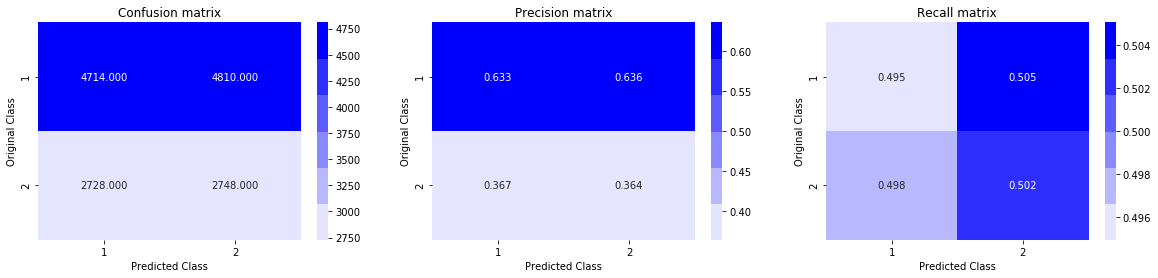

In [92]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.4 Logistic Regression with hyperparameter tuning </h2>

In [93]:
X_train.shape

(35000, 218)

In [94]:
y_train.shape

(35000,)

For values of alpha =  1e-05 The log loss is: 0.6562777762168787
For values of alpha =  0.0001 The log loss is: 0.474786208228817
For values of alpha =  0.001 The log loss is: 0.47500457142019975
For values of alpha =  0.01 The log loss is: 0.4649867150529028
For values of alpha =  0.1 The log loss is: 0.46094660314656
For values of alpha =  1 The log loss is: 0.48712142638748024
For values of alpha =  10 The log loss is: 0.5441906910118214


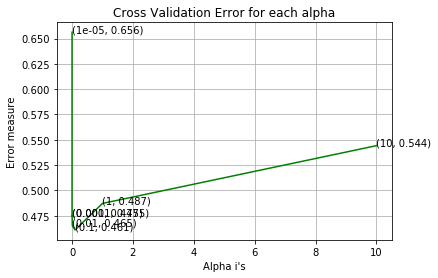

For values of best alpha =  0.1 The train log loss is: 0.45733945812591303
For values of best alpha =  0.1 The test log loss is: 0.46094660314656
Total number of data points : 15000


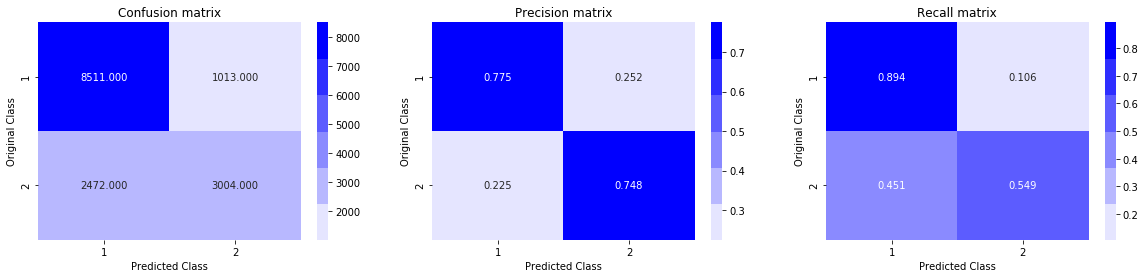

In [95]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.5 Linear SVM with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.6562777762168787
For values of alpha =  0.0001 The log loss is: 0.6562777762168787
For values of alpha =  0.001 The log loss is: 0.4984411909662511
For values of alpha =  0.01 The log loss is: 0.48532281863443477
For values of alpha =  0.1 The log loss is: 0.5553021497921231
For values of alpha =  1 The log loss is: 0.6276979729497534
For values of alpha =  10 The log loss is: 0.6562777762168787


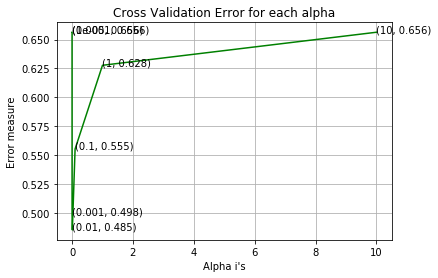

For values of best alpha =  0.01 The train log loss is: 0.48893257796419015
For values of best alpha =  0.01 The test log loss is: 0.48532281863443477
Total number of data points : 15000


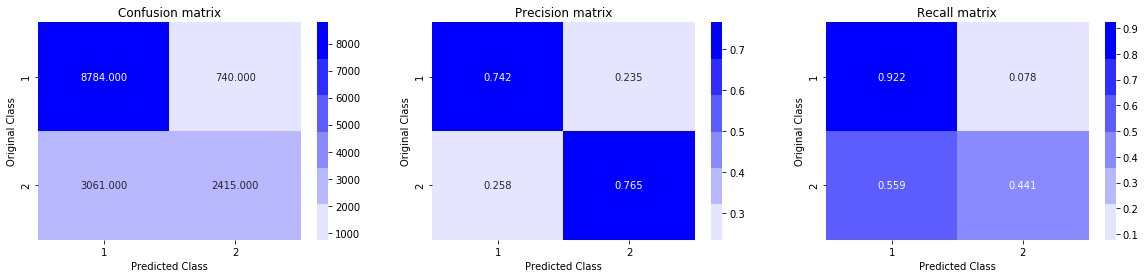

In [96]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.6 XGBoost </h2>

In [97]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[0]	train-logloss:0.68473	valid-logloss:0.68458
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.61578	valid-logloss:0.61480
[20]	train-logloss:0.56538	valid-logloss:0.56393
[30]	train-logloss:0.52747	valid-logloss:0.52580
[40]	train-logloss:0.49818	valid-logloss:0.49641
[50]	train-logloss:0.47525	valid-logloss:0.47335
[60]	train-logloss:0.45650	valid-logloss:0.45460
[70]	train-logloss:0.44183	valid-logloss:0.43993
[80]	train-logloss:0.42955	valid-logloss:0.42780
[90]	train-logloss:0.41978	valid-logloss:0.41804
[100]	train-logloss:0.41160	valid-logloss:0.41001
[110]	train-logloss:0.40470	valid-logloss:0.40330
[120]	train-logloss:0.39884	valid-logloss:0.39765
[130]	train-logloss:0.39383	valid-logloss:0.39290
[140]	train-logloss:0.38932	valid-logloss:0.38857
[150]	train-logloss:0.38560	valid-logloss:0.38515
[160]	train-logloss:0.38235	valid-logloss:0.38227
[170]	trai

Total number of data points : 15000


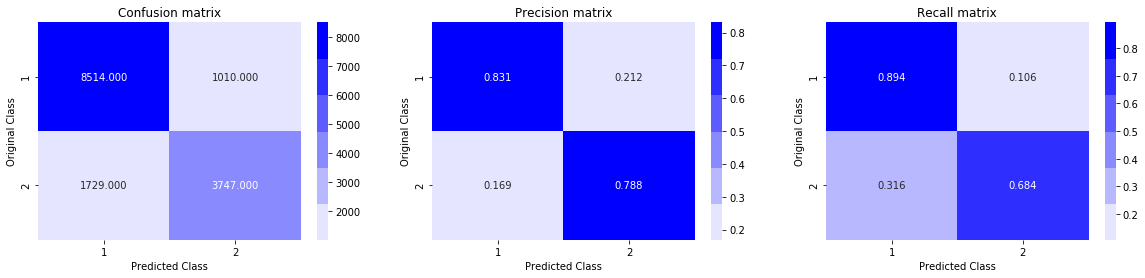

In [98]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h1> 5. Assignments </h1>

1. Try out models (Logistic regression, Linear-SVM) with simple TF-IDF vectors instead of TD_IDF weighted word2Vec.
2. Hyperparameter tune XgBoost using RandomSearch to reduce the log-loss.

### 5.1 : Try out models (Logistic regression, Linear-SVM) with simple TF-IDF vectors instead of TD_IDF weighted word2Vec.

In [99]:
df4  = df1.merge(df3, on='id',how='left')

In [120]:
df4 = df4.sample(n=50000)

In [121]:
df4.shape

(50000, 35)

In [123]:
y_true = df4['is_duplicate_x']

In [124]:
y_true

366818    1
255467    0
308096    1
262542    0
56295     0
         ..
100847    1
40679     0
17474     0
225916    0
295475    0
Name: is_duplicate_x, Length: 50000, dtype: int64

In [125]:
df4 = df4.drop(['is_duplicate_x'],axis=1)

In [126]:
df4.shape

(50000, 34)

In [127]:
X_train,X_test, y_train, y_test = train_test_split(df4, y_true, stratify=y_true, test_size=0.3)

In [128]:
X_train.shape

(35000, 34)

In [129]:
X_test.shape

(15000, 34)

In [130]:
X_train.shape[0] + X_test.shape[0]

50000

In [131]:
# Filling the null values with ' '
X_train = X_train.fillna(' ')
nan_rows1 = X_train[X_train.isnull().any(1)]
print (nan_rows1)

# Filling the null values with ' '
X_test = X_test.fillna(' ')
nan_rows2 = X_test[X_test.isnull().any(1)]
print (nan_rows2)

Empty DataFrame
Columns: [id, question1_x, question2_x, cwc_min, cwc_max, csc_min, csc_max, ctc_min, ctc_max, last_word_eq, first_word_eq, abs_len_diff, mean_len, token_set_ratio, token_sort_ratio, fuzz_ratio, fuzz_partial_ratio, longest_substr_ratio, qid1_y, qid2_y, question1_y, question2_y, is_duplicate_y, freq_qid1, freq_qid2, q1len, q2len, q1_n_words, q2_n_words, word_Common, word_Total, word_share, freq_q1+q2, freq_q1-q2]
Index: []

[0 rows x 34 columns]
Empty DataFrame
Columns: [id, question1_x, question2_x, cwc_min, cwc_max, csc_min, csc_max, ctc_min, ctc_max, last_word_eq, first_word_eq, abs_len_diff, mean_len, token_set_ratio, token_sort_ratio, fuzz_ratio, fuzz_partial_ratio, longest_substr_ratio, qid1_y, qid2_y, question1_y, question2_y, is_duplicate_y, freq_qid1, freq_qid2, q1len, q2len, q1_n_words, q2_n_words, word_Common, word_Total, word_share, freq_q1+q2, freq_q1-q2]
Index: []

[0 rows x 34 columns]


In [132]:
X_train

,id,question1_x,question2_x,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,...,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
319347,319347,does masturbation cause you to lose your virgi...,what is the most awkward moment you have had d...,0.000000,0.000000,0.249994,0.124998,0.124998,0.083333,0.0,...,1,51,69,8,11,0.0,19.0,0.000000,5,3
173960,173960,what are the major applications of the fast fo...,what is the application of fourier transform i...,0.666656,0.444440,0.799984,0.666656,0.666661,0.499997,1.0,...,1,102,74,16,12,8.0,26.0,0.307692,2,0
219393,219393,why does one feel in a grumpy mood after an af...,why is the afternoon nap an integral part of b...,0.333328,0.285710,0.399992,0.333328,0.333331,0.333331,0.0,...,1,58,71,12,12,3.0,24.0,0.125000,2,0
224767,224767,what is a procedural programming language,what is the difference between a procedural la...,0.999967,0.749981,0.999967,0.499992,0.999983,0.499996,1.0,...,7,42,80,6,12,6.0,17.0,0.352941,11,3
171680,171680,which is the best real estate agency in hydera...,what is best real estate company in hyderabad,0.799984,0.799984,0.666644,0.499988,0.749991,0.666659,1.0,...,2,50,46,9,8,6.0,17.0,0.352941,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50375,50375,how does straight talk use cdma,does straight talk use gsm,0.749981,0.749981,0.999900,0.499975,0.799984,0.666656,0.0,...,1,32,27,6,5,4.0,11.0,0.363636,3,1
84899,84899,where can i get quality assistance for budget ...,where can i get best services in property tran...,0.428565,0.428565,0.799984,0.799984,0.583328,0.583328,1.0,...,6,77,73,12,12,7.0,24.0,0.291667,12,0
351192,351192,what are the home remedies for migraine,what are some home remedies for migraines,0.666644,0.666644,0.749981,0.749981,0.714276,0.714276,0.0,...,1,40,42,7,7,5.0,14.0,0.357143,2,0
332171,332171,why south africa is far better well developed...,why is south africa more developed than all th...,0.555549,0.454541,0.499992,0.249998,0.470585,0.296295,1.0,...,1,107,163,17,27,7.0,40.0,0.175000,2,0


In [133]:
## Preparing train data matrix

In [134]:
### Tfidf vectorization on train data

In [135]:
from sklearn.feature_extraction.text import TfidfVectorizer
questions_train = list(X_train['question1_x']) + list(X_train['question2_x'])
vectorizer_tfidf_ques = TfidfVectorizer(lowercase=False,min_df=10)
vectorizer_tfidf_ques.fit(questions_train)

q1_tfidf_train = vectorizer_tfidf_ques.transform(X_train['question1_x'])
q2_tfidf_train = vectorizer_tfidf_ques.transform(X_train['question2_x'])
print("Shape of matrix after q1_tfidf_train ",q1_tfidf_train.shape)
print("Shape of matrix after q2_tfidf_train ",q2_tfidf_train.shape)

Shape of matrix after q1_tfidf_train  (35000, 5243)
Shape of matrix after q2_tfidf_train  (35000, 5243)


In [136]:
X_train = X_train.drop(['id','question1_x','question2_x','qid1_y','qid2_y','question1_y','question2_y','is_duplicate_y'],axis=1)

In [137]:
X_train = hstack((X_train,q1_tfidf_train,q2_tfidf_train))

In [138]:
X_train

<35000x10512 sparse matrix of type '<class 'numpy.float64'>'
	with 1476559 stored elements in COOrdinate format>

In [139]:
## Preparing test data matrix

In [140]:
### Tfidf vectorization on test data

In [141]:
from sklearn.feature_extraction.text import TfidfVectorizer

q1_tfidf_test = vectorizer_tfidf_ques.transform(X_test['question1_x'])
q2_tfidf_test = vectorizer_tfidf_ques.transform(X_test['question2_x'])
print("Shape of matrix after q1_tfidf_test ",q1_tfidf_test.shape)
print("Shape of matrix after q2_tfidf_test ",q2_tfidf_test.shape)

Shape of matrix after q1_tfidf_test  (15000, 5243)
Shape of matrix after q2_tfidf_test  (15000, 5243)


In [142]:
X_test = X_test.drop(['id','question1_x','question2_x','qid1_y','qid2_y','question1_y','question2_y','is_duplicate_y'],axis=1)

In [143]:
X_test = hstack((X_test,q1_tfidf_test,q2_tfidf_test))

In [144]:
X_test

<15000x10512 sparse matrix of type '<class 'numpy.float64'>'
	with 629718 stored elements in COOrdinate format>

<h2> Logistic Regression with hyperparameter tuning </h2>

In [145]:
X_train.shape

(35000, 10512)

In [146]:
y_train.shape

(35000,)

For values of alpha =  1e-05 The log loss is: 0.4239084502176892
For values of alpha =  0.0001 The log loss is: 0.42133595096443316
For values of alpha =  0.001 The log loss is: 0.4276476753044173
For values of alpha =  0.01 The log loss is: 0.44888942270960974
For values of alpha =  0.1 The log loss is: 0.4672225344539347
For values of alpha =  1 The log loss is: 0.49287165665131444
For values of alpha =  10 The log loss is: 0.5438990458077068


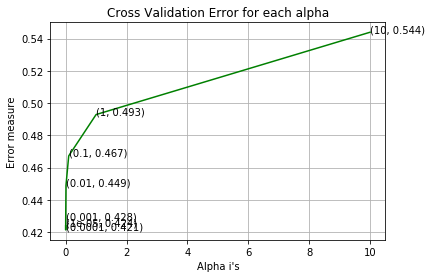

For values of best alpha =  0.0001 The train log loss is: 0.4098560095338106
For values of best alpha =  0.0001 The test log loss is: 0.42133595096443316
Total number of data points : 15000


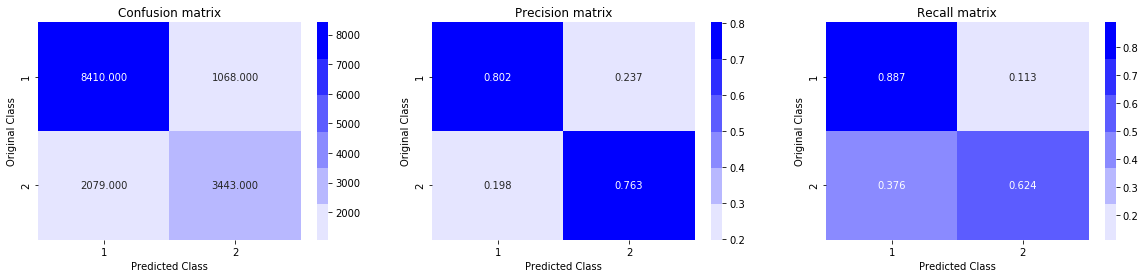

In [147]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> Linear SVM with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.4292759304671845
For values of alpha =  0.0001 The log loss is: 0.4564160248559246
For values of alpha =  0.001 The log loss is: 0.4869125057944675
For values of alpha =  0.01 The log loss is: 0.5194851409740828
For values of alpha =  0.1 The log loss is: 0.48594725834867764
For values of alpha =  1 The log loss is: 0.5816175686633855
For values of alpha =  10 The log loss is: 0.6440725828259336


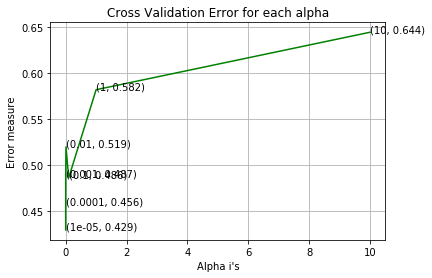

For values of best alpha =  1e-05 The train log loss is: 0.41321714766442486
For values of best alpha =  1e-05 The test log loss is: 0.4292759304671845
Total number of data points : 15000


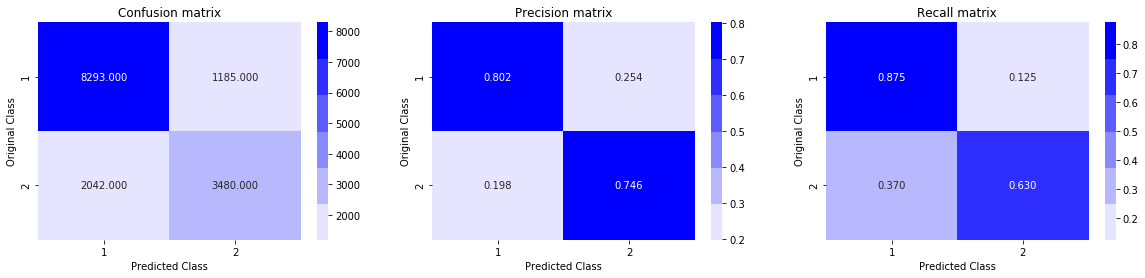

In [148]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.6 XGBoost </h2>

In [149]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
params = {      
    'max_depth': [3, 4, 5, 6, 7, 8],       
    'eta' : [0.01, 0.02, 0.05, 0.1]   
}

xgb = xgb.XGBClassifier()
random_search = RandomizedSearchCV(xgb, param_distributions=params, scoring='neg_log_loss', n_jobs=-1, verbose=10, random_state=42 ,return_train_score=True) 
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:  3.1min remaining:   41.3s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:  3.6min remaining:   13.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.8min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=Non...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                    

In [150]:
print('Best hyperparameters:')
print(random_search.best_params_)

Best hyperparameters:
{'eta': 0.1, 'max_depth': 6}


In [151]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 8

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[0]	train-logloss:0.68283	valid-logloss:0.68329
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.59823	valid-logloss:0.60271
[20]	train-logloss:0.53724	valid-logloss:0.54518
[30]	train-logloss:0.49113	valid-logloss:0.50250
[40]	train-logloss:0.45582	valid-logloss:0.47034
[50]	train-logloss:0.42791	valid-logloss:0.44540
[60]	train-logloss:0.40547	valid-logloss:0.42572
[70]	train-logloss:0.38748	valid-logloss:0.41006
[80]	train-logloss:0.37278	valid-logloss:0.39769
[90]	train-logloss:0.36050	valid-logloss:0.38797
[100]	train-logloss:0.35040	valid-logloss:0.38008
[110]	train-logloss:0.34218	valid-logloss:0.37378
[120]	train-logloss:0.33535	valid-logloss:0.36870
[130]	train-logloss:0.32970	valid-logloss:0.36466
[140]	train-logloss:0.32435	valid-logloss:0.36115
[150]	train-logloss:0.31976	valid-logloss:0.35818
[160]	train-logloss:0.31557	valid-logloss:0.35560
[170]	trai

In [152]:
print("The test log loss is:",log_loss(y_test, predict_y, labels=random_search.classes_, eps=1e-15))

The test log loss is: 0.33942745680772546


Total number of data points : 15000


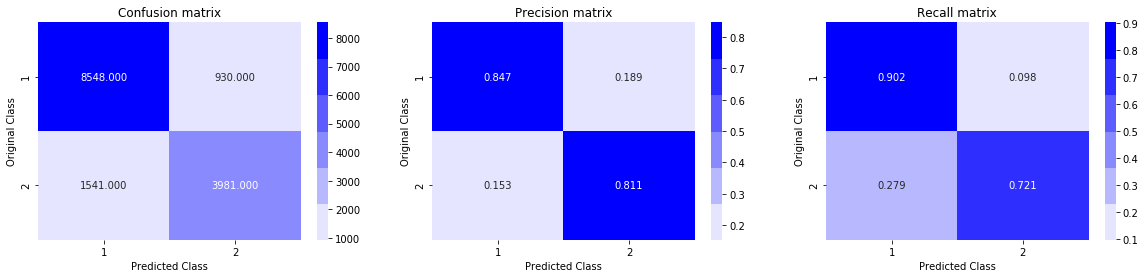

In [153]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [154]:
from prettytable import PrettyTable
x = PrettyTable() 
x.field_names = ["Vectorizer", "Model", "Test log loss"] 
x.add_row(["TFIDF", "Random Model", 0.88]) 
x.add_row(["TFIDF", "Logistic Regression", 0.42])
x.add_row(["TFIDF", "Linear SVM", 0.45]) 
x.add_row(["TFIDF", "XGBoost", 0.33])
print(x)


+------------+---------------------+---------------+
| Vectorizer |        Model        | Test log loss |
+------------+---------------------+---------------+
|   TFIDF    |     Random Model    |      0.88     |
|   TFIDF    | Logistic Regression |      0.42     |
|   TFIDF    |      Linear SVM     |      0.45     |
|   TFIDF    |       XGBoost       |      0.33     |
+------------+---------------------+---------------+


## Conclusion :

# with TFIDF vectorization got Test_log_loss

## 1) Logistic Regression:0.42
    
## 2) Linear SVM: 0.45
    
## 3) XGBoost: 0.33